In [1]:
#importing statements, libraries we use
import re
import os
import pandas as pd
import docx2txt
import string
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
import matplotlib as mpl
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
import pickle

In [2]:
path = '/mnt/c/Users/Zackw/Downloads/2019 MCP Cohort 2'
data = pd.read_pickle(path + '/' + 'dtm.pkl')
data = data.transpose()

def makeClouds(graphs, ngram, filtered):

    top_dict = {}
    for c in data.columns:
        top = data[c].sort_values(ascending=False).head(30)
        top_dict[c]= list(zip(top.index, top.values))

    top_dict
    # Let's first pull out the top 30 words for each comedian
    words = []
    for doc in data.columns:
        top = [word for (word, count) in top_dict[doc]]
        for t in top:
            words.append(t)
            
    add_stop_words = [word for word, count in Counter(words).most_common() if count > 35]

    data_clean = pd.read_pickle(path + '/' + 'data_clean.pkl')

    # Add new stop words
    if filtered == True:
        stop_words = text.ENGLISH_STOP_WORDS
    else:
        stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

    # Recreate document-term matrix
    cv = CountVectorizer(stop_words=stop_words, ngram_range=(ngram, ngram))
    data_cv = cv.fit_transform(data_clean.Text)
    data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
    data_stop.index = data_clean.index

    # Pickle it for later use
    pickle.dump(cv, open(path + '/' + "cv_stop.pkl", "wb"))
    data_stop.to_pickle(path + '/' + "dtm_stop.pkl")

    wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
                max_font_size=150, random_state=42)

    plt.rcParams['figure.figsize'] = [16, 6]

    # Create subplots for each wordcloud
    for index, doc in enumerate(data.columns[68:68 + graphs]):
        wc.generate(data_clean.Text[doc])
        
        ax1 = plt.subplot(4, 3, index+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        
    plt.show()

    return

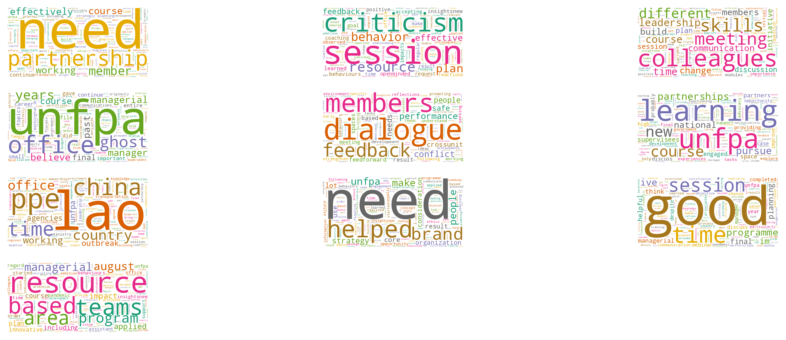

In [4]:
makeClouds(12, 1, False)